In [1]:
import warnings

from NeuralNetwork.CNN import CNN_MEL, CNN_CHR, CNN_MFCC

warnings.filterwarnings("ignore")

2023-12-27 21:25:08.297699: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-27 21:25:08.321312: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-27 21:25:08.321335: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-27 21:25:08.322017: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-27 21:25:08.326092: I tensorflow/core/platform/cpu_feature_guar

In [2]:
try:
    del model_mel
    del model_chr
    del model_mfcc
    print("clean!")
except:
    pass
model_mel = CNN_MEL((128, 128, 1))
model_chr = CNN_CHR((12, 1293, 1))
model_mfcc = CNN_MFCC((20, 1293, 1))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 128)       0

2023-12-27 21:25:09.862494: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-27 21:25:09.893973: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-27 21:25:09.894110: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

None
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 20, 1293, 32)      320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 10, 646, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 10, 646, 64)       18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 323, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 5, 323, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 2, 161, 128) 

Found 4995 images belonging to 10 classes.
Found 999 images belonging to 10 classes.
Epoch 1/5


2023-12-27 21:19:44.405585: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2023-12-27 21:19:44.605138: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8906
2023-12-27 21:19:44.836103: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-27 21:19:45.512002: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-27 21:19:46.065151: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fef94bf8e70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-27 21:19:46.065169: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 30

250/250 - 15s - loss: 1.4920 - acc: 0.4699 - val_loss: 1.8999 - val_acc: 0.2813 - 15s/epoch - 59ms/step
Epoch 2/5
250/250 - 7s - loss: 0.9466 - acc: 0.6611 - val_loss: 1.0270 - val_acc: 0.6747 - 7s/epoch - 29ms/step
Epoch 3/5
250/250 - 7s - loss: 0.6591 - acc: 0.7776 - val_loss: 0.6699 - val_acc: 0.7678 - 7s/epoch - 29ms/step
Epoch 4/5
250/250 - 7s - loss: 0.4285 - acc: 0.8631 - val_loss: 0.8617 - val_acc: 0.7117 - 7s/epoch - 29ms/step
Epoch 5/5
250/250 - 7s - loss: 0.2510 - acc: 0.9253 - val_loss: 0.6327 - val_acc: 0.7918 - 7s/epoch - 29ms/step


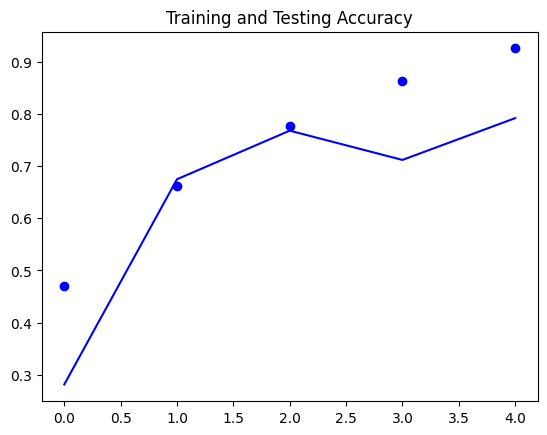

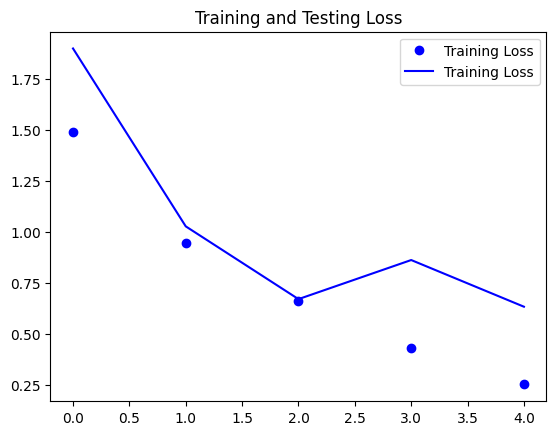

Found 999 images belonging to 10 classes.
Epoch 1/5
50/50 - 6s - loss: 2.3592 - acc: 0.1772 - 6s/epoch - 121ms/step
Epoch 2/5
50/50 - 1s - loss: 1.7394 - acc: 0.3794 - 1s/epoch - 21ms/step
Epoch 3/5
50/50 - 1s - loss: 1.1677 - acc: 0.6246 - 1s/epoch - 22ms/step
Epoch 4/5
50/50 - 1s - loss: 0.6911 - acc: 0.7948 - 1s/epoch - 22ms/step
Epoch 5/5
50/50 - 1s - loss: 0.3360 - acc: 0.9329 - 1s/epoch - 21ms/step


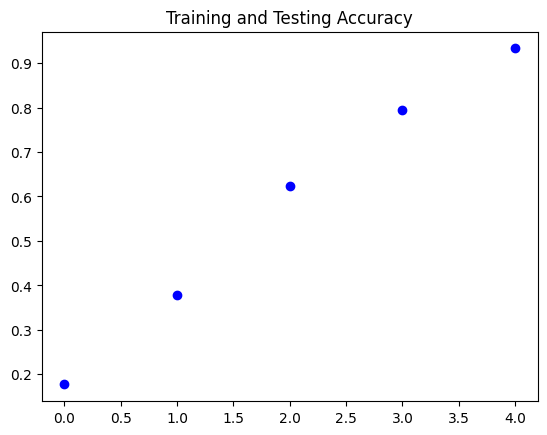

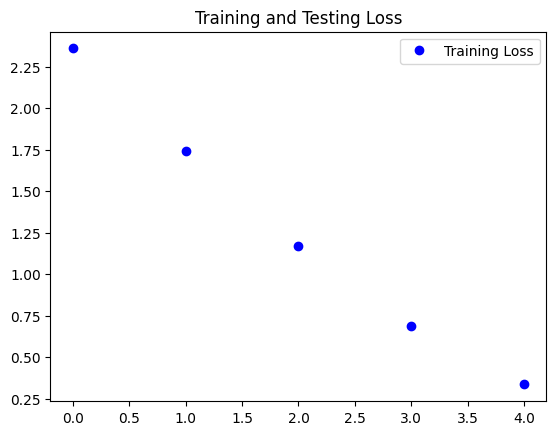

Found 999 images belonging to 10 classes.
Epoch 1/20
50/50 - 7s - loss: 2.4409 - acc: 0.1301 - 7s/epoch - 147ms/step
Epoch 2/20
50/50 - 2s - loss: 2.0230 - acc: 0.2703 - 2s/epoch - 38ms/step
Epoch 3/20
50/50 - 2s - loss: 1.8091 - acc: 0.3273 - 2s/epoch - 39ms/step
Epoch 4/20
50/50 - 2s - loss: 1.7333 - acc: 0.3473 - 2s/epoch - 38ms/step
Epoch 5/20
50/50 - 2s - loss: 1.6394 - acc: 0.3954 - 2s/epoch - 38ms/step
Epoch 6/20
50/50 - 2s - loss: 1.5630 - acc: 0.4124 - 2s/epoch - 38ms/step
Epoch 7/20
50/50 - 2s - loss: 1.4631 - acc: 0.4575 - 2s/epoch - 38ms/step
Epoch 8/20
50/50 - 2s - loss: 1.4227 - acc: 0.4765 - 2s/epoch - 38ms/step
Epoch 9/20
50/50 - 2s - loss: 1.3521 - acc: 0.4955 - 2s/epoch - 38ms/step
Epoch 10/20
50/50 - 2s - loss: 1.2717 - acc: 0.5445 - 2s/epoch - 38ms/step
Epoch 11/20
50/50 - 2s - loss: 1.2573 - acc: 0.5325 - 2s/epoch - 38ms/step
Epoch 12/20
50/50 - 2s - loss: 1.1383 - acc: 0.5956 - 2s/epoch - 38ms/step
Epoch 13/20
50/50 - 2s - loss: 1.0583 - acc: 0.6236 - 2s/epoch - 3

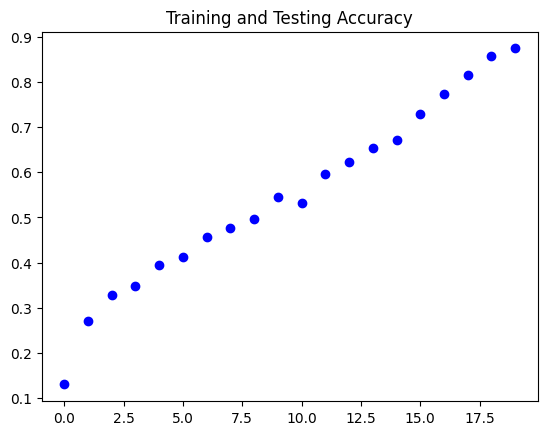

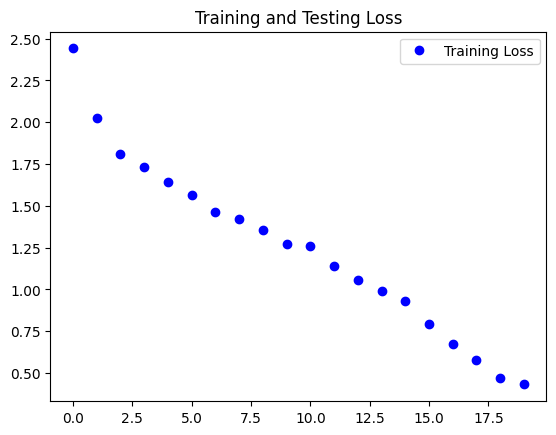

In [3]:
model_mel.train("./dataset/mel_format", "./dataset/mel_test", epoch=5)
model_chr.train("./dataset/chr_format", epoch=5)
model_mfcc.train("./dataset/mfcc_format", epoch=20)

In [4]:
model_mel.save_model("./model/model_mel.h5")
model_chr.save_model("./model/model_chr.h5")
model_mfcc.save_model("./model/model_mfcc.h5")

In [3]:
model_mel.load_model("./model/model_mel.h5")
model_chr.load_model("./model/model_chr.h5")
model_mfcc.load_model("./model/model_mfcc.h5")

In [38]:
import numpy as np
import librosa

# y, sr = librosa.load("/home/mspt5/Music/万能青年旅店 - 杀死那个石家庄人.mp3")
y, sr = librosa.load("./dataset/audio_format/classical/classical.00000.wav")

spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)

mel_pic = librosa.power_to_db(spectrogram, ref=np.max)

harmonic = librosa.effects.harmonic(y)  ##
harmonic_features = librosa.feature.chroma_cqt(y=harmonic, sr=sr)  ##

mfccs = librosa.feature.mfcc(y=y, sr=sr)

duration = len(y) / sr

ans_mel, pre_mel = model_mel.predict(mel_pic, duration)
print(ans_mel)
ans_chr, pre_chr = model_chr.predict(harmonic_features, duration)
print(ans_chr)
ans_mfcc, pre_mfcc = model_mfcc.predict(mfccs, duration)
print(ans_mfcc)
class_index = np.argmax((pre_mfcc + 2 * pre_chr + pre_mel) / 4, axis=1)[0]
print(pre_chr)
print(pre_mel)
print(pre_mfcc)
print(["pop", "classical", "pop", "pop", "pop", "jazz", "rock", "pop", "pop", "rock"][class_index])

1/1 [==============================] - 0s 16ms/step
pop
1/1 [==============================] - 0s 17ms/step
classical
1/1 [==============================] - 0s 18ms/step
pop
[[0.26010457 0.3809898  0.01728382 0.05198154 0.01239798 0.18554293
  0.00818164 0.02239976 0.02509457 0.0360233 ]]
[[0.01239238 0.04356092 0.00826353 0.00230054 0.0265961  0.12370821
  0.32116273 0.00089786 0.44909933 0.01201838]]
[[0.33387092 0.01114002 0.00360973 0.00070483 0.08713425 0.00496782
  0.03717227 0.05601987 0.43567616 0.02970407]]
pop


In [20]:
import librosa

# 加载音频文件
audio_file = './dataset/audio_format/blues/blues.00000.wav'  # 替换为您的音频文件路径
y, sr = librosa.load(audio_file)

# 1. 音高和旋律特征
chroma = librosa.feature.chroma_cqt(y=y, sr=sr)

# 2. 节奏和节拍
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
beat_times = librosa.frames_to_time(beat_frames, sr=sr)

# 3. 和声和和弦结构
harmonic = librosa.effects.harmonic(y)
harmonic_features = librosa.feature.chroma_cqt(y=harmonic, sr=sr)

# 4. 音色和乐器使用
mfccs = librosa.feature.mfcc(y=y, sr=sr)

# 5. 动态范围和强度
S, phase = librosa.magphase(librosa.stft(y))
rms = librosa.feature.rms(S=S)

# 6. 时间结构和形式
temporal_onset = librosa.onset.onset_strength(y=y, sr=sr)

# 7. 时域特征
zero_crossing_rate = librosa.feature.zero_crossing_rate(y)

# 输出每个特征的shape
print("Chroma (Pitch):", chroma.shape)
print("Tempo (Rhythm):", beat_times.shape)
print("Harmonic Features (Harmony):", harmonic_features.shape)
print("MFCCs (Timbre):", mfccs.shape)
print("RMS (Dynamics):", rms.shape)
print("Temporal Onset (Form):", temporal_onset.shape)
print("Zero Crossing Rate (Time-domain):", zero_crossing_rate.shape)

Chroma (Pitch): (12, 1293)
Tempo (Rhythm): (61,)
Harmonic Features (Harmony): (12, 1293)
MFCCs (Timbre): (20, 1293)
RMS (Dynamics): (1, 1293)
Temporal Onset (Form): (1293,)
Zero Crossing Rate (Time-domain): (1, 1293)
